In [1]:
import numpy as np
##from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt
import scipy.signal as sig
from math import pi

In [2]:
fs = 360
n =5
fc = 150
wc = 2*fc/fs
[b,a] = sig.butter(n,wc)

Text(0.5, 1.0, 'IIR filter')

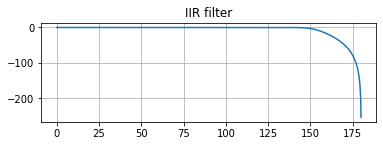

In [4]:
# Frequency response
[w,h] = sig.freqz(b,a,worN=2000)
w = fs*w/(2*pi)
h_db = 20*np.log10(abs(h))
plt.subplot(211)
plt.plot(w,h_db)
plt.grid('on')
plt.title('IIR filter')

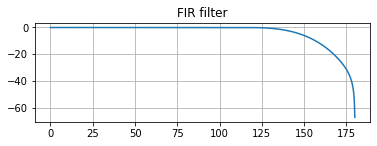

In [5]:
N = 20
fc =150
wc = 2*fc/fs
t = sig.firwin(N,wc)
[w,h] = sig.freqz(t, worN=2000)
w = fs*w/(2*pi)
h_db = 20*np.log10(abs(h))
plt.subplot(212)

plt.plot(w,h_db)
plt.grid('on')
plt.title('FIR filter')

# Apply FIR LPF filter on ECG signal


plt.show()

In [6]:
import numpy as np
import scipy
from scipy.signal import butter, lfilter, freqz, firwin
from matplotlib import pyplot as plt

In [7]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [8]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [9]:
order = 5
fs = 360.0       # sample rate, Hz
cutoff = 150  

In [10]:
b, a = butter_lowpass(cutoff, fs, order)

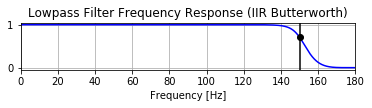

In [11]:
w, h = freqz(b, a, worN=8000)
plt.subplot(411)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response (IIR Butterworth)")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [12]:
T = 10.0             # seconds
n = int(T * fs)      # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.loadtxt('./samples.csv')

In [13]:
y = butter_lowpass_filter(data, cutoff, fs, order)

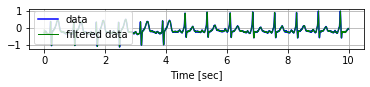

In [14]:
plt.subplot(412)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=1, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.50)

In [15]:
N = 20
fc = 150
wc = 2*fc/fs
t1 = firwin(N,wc)
w1,h1 = freqz(t1,worN = 2000)

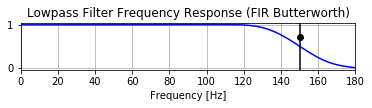

In [16]:
plt.subplot(413)
plt.plot(0.5*fs*w1/np.pi, np.abs(h1), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response (FIR Butterworth)")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [19]:
def fir_filter(fs,N,data):
	fc=20
	wc=2*fc/fs
	t1=firwin(N,wc)
	w1,h1=freqz(t1,worN=2000)
	y = lfilter(w1,h1, data)
	return y

C:\Users\Rajat\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


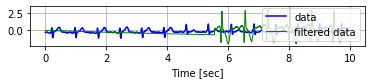

In [20]:
y1=fir_filter(fs,20,data)
plt.subplot(414)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y1, 'g-', linewidth=1, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.50)

plt.show()

C:\Users\Rajat\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


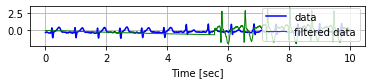

In [21]:
plt.subplot(412)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y1, 'g-', linewidth=1, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.50)